<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/BP_Tungkub_Rs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Import Library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
#Reading Dataset dalam format data Excel
df = pd.read_excel('/content/Tungkub_Hourly_PM_New.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()

,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2023-02-13 12:00:02,2023,44,12,29.312,70.219,1,438.1,-0.23786,1.023978,...,1256.791534,193.254701,33.560402,69,247.677118,0.891638,0.363934,h,0.12,m
3,2023-02-13 13:00:02,2023,44,13,29.676,69.697,1.67,375.6,-0.23786,1.023978,...,1252.71032,115.721378,28.75582,69,221.856096,0.798682,0.325993,rc day,69.00,s/m
4,2023-02-13 14:00:02,2023,44,14,28.11,78.695,1.34,323.1,-0.23786,1.023978,...,1249.075848,144.219926,24.783312,69,179.470678,0.646094,0.263712,rc night,690.00,s/m
5,2023-02-13 15:00:02,2023,44,15,26.588,76.712,1,214.4,-0.23786,1.023978,...,1242.151358,193.254701,16.314088,69,120.980315,0.435529,0.177767,Latitude,-8.00,degrees
6,2023-02-13 16:00:02,2023,44,16,27.767,76.011,0.67,210.6,-0.23786,1.023978,...,1239.162128,288.439852,16.06366,69,119.166415,0.428999,0.175102,Longitude,115.00,degrees


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 2 to 5562
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5561 non-null   object 
 1   Year         5561 non-null   object 
 2   DOY          5561 non-null   object 
 3   Time         5561 non-null   object 
 4   T            5561 non-null   object 
 5   RH           5561 non-null   object 
 6   U            5561 non-null   object 
 7   Rs           5561 non-null   object 
 8   Dec          5561 non-null   object 
 9   dr           5561 non-null   object 
 10  t.c.         5561 non-null   object 
 11  angh         5561 non-null   object 
 12  cos θ        5561 non-null   object 
 13  Rs pot       5561 non-null   object 
 14  TRA          5561 non-null   float64
 15  Rb           5561 non-null   object 
 16  es           5561 non-null   object 
 17  e            5561 non-null   object 
 18  VPD          5561 non-null   object 
 19  Rn    

In [30]:
#Mengubah Tipe data menjadi Float
df[['Rs', 'RH', 'U', 'T', 'ET']] = df[['Rs', 'RH', 'U', 'T', 'ET']].astype(float)

In [31]:
df[['Rs', 'RH', 'U', 'T', 'ET']].describe()


,Rs,RH,U,T,ET
count,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000
mean,193.424510,81.053563,0.400599,26.378555,0.155357
std,303.738622,12.268428,0.285843,3.545059,0.246325
min,0.600000,39.576000,0.200000,19.124000,-0.009460
25%,0.600000,70.335000,0.200000,23.671000,0.000700
50%,4.400000,85.489000,0.330000,25.665000,0.004385
75%,265.600000,91.156000,0.670000,29.269000,0.211899
max,1276.900000,99.261000,2.670000,35.789000,1.022905


In [32]:
#Input features dan target variable
features_variable = df['Rs']
target_variable = df['ET']

X = features_variable #independent variabel
y = target_variable #dependent variabel

In [33]:
#Split dataset untuk training dan testing dataset dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Jumlah data untuk training dan testing
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(3892,) (1669,) (3892,) (1669,)


In [41]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(activation = 'relu', solver = 'adam')


In [42]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

bp = model.fit(X_train_reshaped, y_train)

In [45]:
#Save model
import joblib
joblib.dump(model,'ModelBP_Tungkub_Rs.joblib')

['ModelBP_Tungkub_Rs.joblib']

Model Evaluation

In [43]:
#Prediction on Training Dataset
ytrain_pred = bp.predict(X_train_reshaped)

#Nilai R Squared pada Data Training
print('Nilai R_Squared (Training): %.2f'% r2_score(y_train, ytrain_pred))
#Nilai MSE pada Data Training
print('Nilai MSE (Training): %.2f'% mean_squared_error(y_train, ytrain_pred))
#Nilai RMSE pada Data Training
print('The RMSE (Training): %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))


Nilai R_Squared (Training): 0.99
Nilai MSE (Training): 0.00
The RMSE (Training): 0.02


In [44]:
#Prediction on Testing Dataset
ytest_pred =bp.predict(X_test_reshaped)

#Nilai R Squared pada Data Testing
print('Nilai R_Squared (Testing): %.2f'% r2_score(y_test, ytest_pred))
#Nilai MSE pada Data Testing
print('Nilai MSE (Testing): %.2f'% mean_squared_error(y_test, ytest_pred))
#Nilai RMSE pada Data Testing
print('Nilai RMSE (Testing): %.2f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))


Nilai R_Squared (Testing): 0.99
Nilai MSE (Testing): 0.00
Nilai RMSE (Testing): 0.02


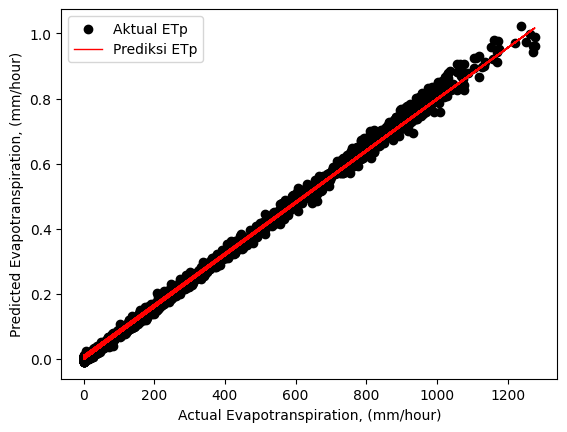

In [19]:
import matplotlib.pyplot as plt
# Plot pada data pelatihan
plt.scatter(X_train_reshaped, y_train, color='black', label='Aktual ETp')
plt.plot(X_train_reshaped, ytrain_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.xlabel('Actual Evapotranspiration, (mm/hour)')
plt.ylabel('Predicted Evapotranspiration, (mm/hour)')
plt.legend()
plt.show()


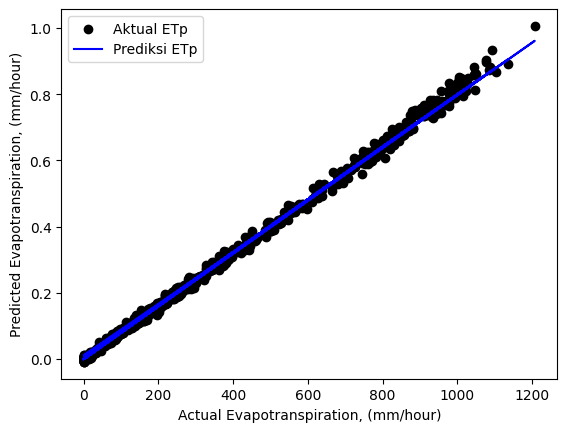

In [20]:
#Plot pada data test
plt.scatter(X_test_reshaped, y_test, color = 'black', label = 'Aktual ETp')
plt.plot(X_test_reshaped, ytest_pred, color='blue', label='Prediksi ETp')
plt.xlabel('Actual Evapotranspiration, (mm/hour)')
plt.ylabel('Predicted Evapotranspiration, (mm/hour)')
plt.legend()
plt.show()

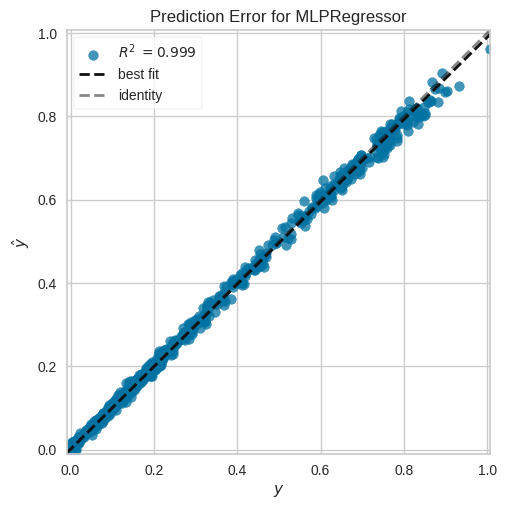

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [22]:
#Plotting Prediction Error
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(bp)
visualizer.fit(X_train_reshaped, y_train)
visualizer.score(X_test_reshaped, y_test)
visualizer.poof()


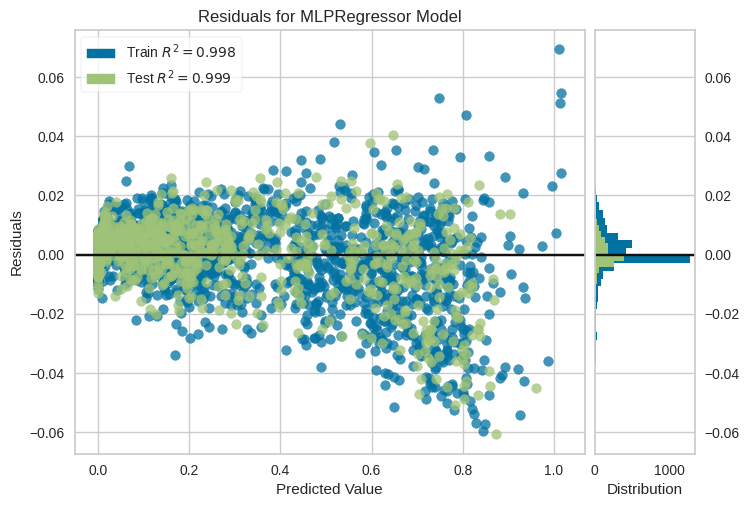

<Axes: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(bp)
visualizer.fit(X_train_reshaped, y_train)
visualizer.score(X_test_reshaped, y_test)
visualizer.poof()

In [25]:
# K Fold Cross Validation
from sklearn.model_selection import cross_val_score
#Training Model CV
score_train = cross_val_score(bp, X_train_reshaped, y_train, scoring ='neg_mean_squared_error', cv = 10)
print(score_train)
#The mean score
print('Mean CV (Train):', np.mean(score_train))

[-1.03614086e-04 -1.32371603e-03 -1.10592761e-04 -5.03918288e-04
 -1.99147518e-04 -1.24000444e-04 -1.13954108e-04 -6.34030232e-05
 -1.00041631e-04 -1.31521953e-04]
Mean CV (Train): -0.00027739098410552713


In [26]:
#Testing Model CV
score_test = cross_val_score(bp, X_test_reshaped, y_test, scoring ='neg_mean_squared_error', cv = 10)
print(score_test)
#The mean score test
print('Mean CV (Test)', np.mean(score_test))

[-1.35445446e-04 -4.38886399e-04 -8.20113444e-05 -1.09915211e-04
 -2.08844139e-04 -1.00638011e-03 -3.14572282e-04 -4.72123629e-04
 -9.13559814e-04 -1.71797757e-02]
Mean CV (Test) -0.002086151407668249


In [ ]:
#Variabel
learning_rate = 0.1
iterations = 100
N = y_train.size

In [ ]:
input_size = 1
hidden_size = 3829
output_size = 1

#results = pd.DataFrame(columns = ['r2_score', 'mse', 'rmse'])

In [ ]:
#Weights
np.random.seed(10)
#Weight (Hidden Layer)
W1 = np.random.normal(scale=0.5, size=(input_size,hidden_size))
#Weight (Output layer)
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

In [ ]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

def r2_score(y_pred, y_actual):
  return 1 - mean_squared_error(y_pred, y_actual)/np.var(y_actual)

def mean_squared_error(y_pred, y_actual):
  return ((y_pred - y_actual)**2).sum()/(2*y_pred.size)

def root_mean_squared_error(y_pred, y_actual):
  return np.sqrt(mean_squared_error(y_pred, y_actual))

In [ ]:
W1 = W1.reshape(-1, 1)

for itr in range(iterations):
  #FP (Hidden Layer)
  Z1 = np.dot(X_train.values, W1)
  A1 = sigmoid(Z1)
  #Output Layer
  Z2 = np.dot(A1, W2)
  A2 = sigmoid(Z2)


ValueError: shapes (3892,) and (3829,1) not aligned: 3892 (dim 0) != 3829 (dim 0)

In [ ]:
#Perhitungan Error
  r2 = r2_score(A2, y_train)
  mse = mean_squared_error(A2, y_train)
  rmse = root_mean_squared_error(A2, y_train)

  results=results.append({"r2_score":r2, "mse":mse, "rmse":rmse},ignore_index=True )


In [ ]:
# backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

In [ ]:
#weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.values.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


In [ ]:
# Plotting the results
plt.plot(results['mse'])
plt.plot(results['r2_score'])
plt.plot(results['rmse'])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Fit the model
bp = model.fit(X_train, y_train, epochs=50, batch_size=10)



Epoch 1/50
390/390 [==============================] - 1s 2ms/step - loss: 1.3884e-04
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 1.6473e-04
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 1.5441e-04
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 1.7534e-04
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 1.3713e-04
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 1.2994e-04
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 1.3703e-04
Epoch 8/50
390/390 [==============================] - 1s 2ms/step - loss: 1.4141e-04
Epoch 9/50
390/390 [==============================] - 1s 2ms/step - loss: 1.8558e-04
Epoch 10/50
390/390 [==============================] - 1s 2ms/step - loss: 1.2170e-04
Epoch 11/50
390/390 [==============================] - 1s 2ms/step - loss: 1.1192e-04
Epoch 12/50
390/390 [==============================] - 1s 2ms/s

In [ ]:
#Prediction on Training Dataset
ytrain_pred = model.predict(X_train)

#Nilai R Squared pada Data Training
print('Nilai R_Squared (Training): %.2f'% r2_score(y_train, ytrain_pred))
#Nilai MSE pada Data Training
print('Nilai MSE (Training): %.2f'% mean_squared_error(y_train, ytrain_pred))
#Nilai RMSE pada Data Training
print('The RMSE (Training): %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

122/122 [==============================] - 0s 1ms/step
Nilai R_Squared (Training): 1.00
Nilai MSE (Training): 0.00
The RMSE (Training): 0.01


In [ ]:
#Prediction on Testing Dataset
ytest_pred = model.predict(X_test)

# Evaluate predictions
rmse = np.sqrt(mean_squared_error(y_test, ytest_pred))
print('Nilai R_Squared (Testing): %.2f'% r2_score(y_test, ytest_pred))
print('Mean Squared Error (Testing) : %.2f'% mean_squared_error(y_test, ytest_pred))
print(f'Root Mean Squared Error (Testing): {rmse}')

53/53 [==============================] - 0s 5ms/step
Nilai R_Squared (Testing): 1.00
Mean Squared Error (Testing) : 0.00
Root Mean Squared Error (Testing): 0.010975602655783583


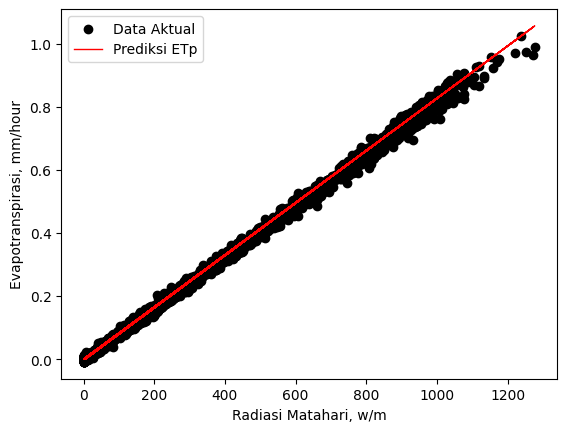

In [ ]:
import matplotlib.pyplot as plt
## Plot data aktual dan prediksi pada data pelatihan
plt.scatter(X_train, y_train, color='black', label='Data Aktual')
plt.plot(X_train, ytrain_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.xlabel('Radiasi Matahari, w/m')
plt.ylabel('Evapotranspirasi, mm/hour')
plt.legend()
plt.show()

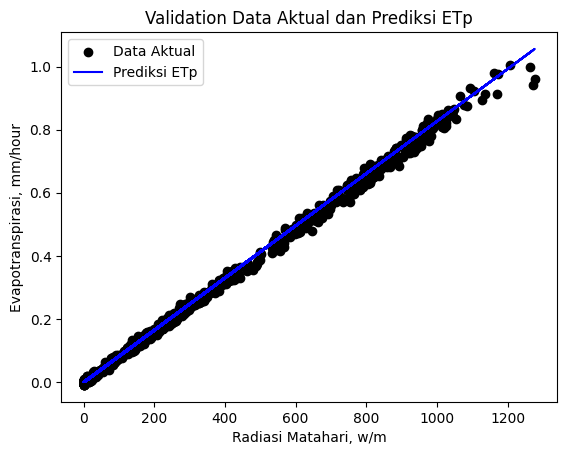

In [ ]:
#Plot pada data test
plt.scatter(X_test, y_test, color = 'black', label = 'Data Aktual')
plt.plot(X_test, ytest_pred, color='blue', label='Prediksi ETp')
plt.title('Validation Data Aktual dan Prediksi ETp')
plt.xlabel('Radiasi Matahari, w/m')
plt.ylabel('Evapotranspirasi, mm/hour')
plt.legend()
plt.show()